# Import Libraries and data

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install catboost

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading data
# data frame => pandas
df = pd.read_csv('/content/drive/MyDrive/Private Class Pak Arnold -  Classification/Code/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Pengolahan Data

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

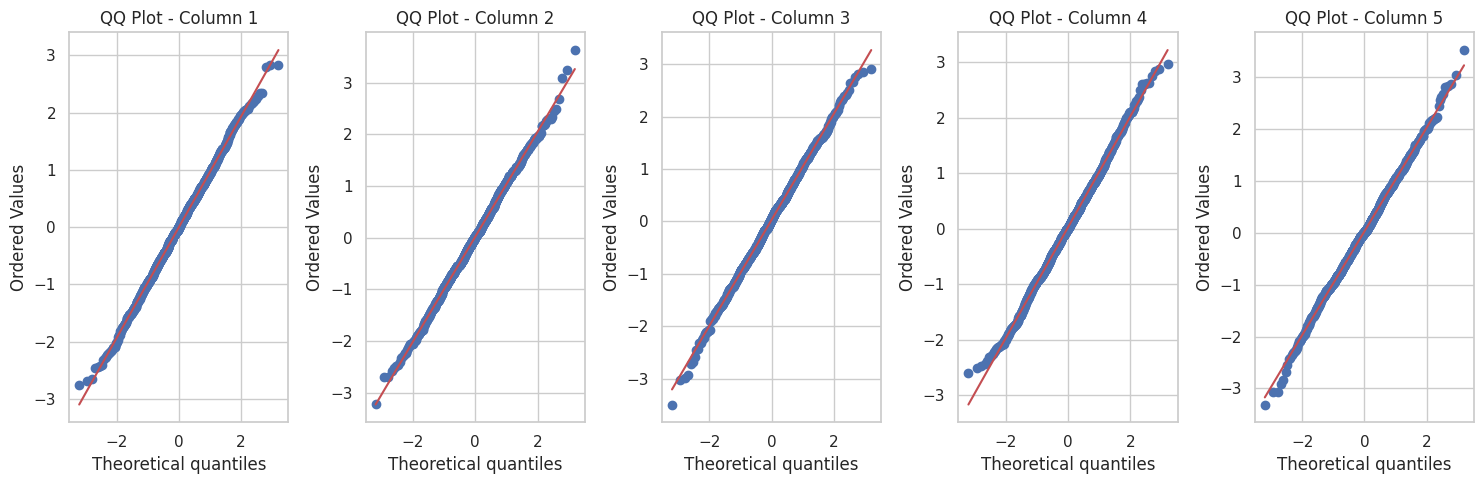

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Generate example data with multiple columns
data = np.random.normal(loc=0, scale=1, size=(1000, 5))  # 5 columns

# Create QQ plots for each column
num_cols = data.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

for i in range(num_cols):
    ax = axes[i]
    stats.probplot(data[:, i], dist="norm", plot=ax)
    ax.set_title(f'QQ Plot - Column {i+1}')

plt.tight_layout()
plt.show()

# Visualisasi Data

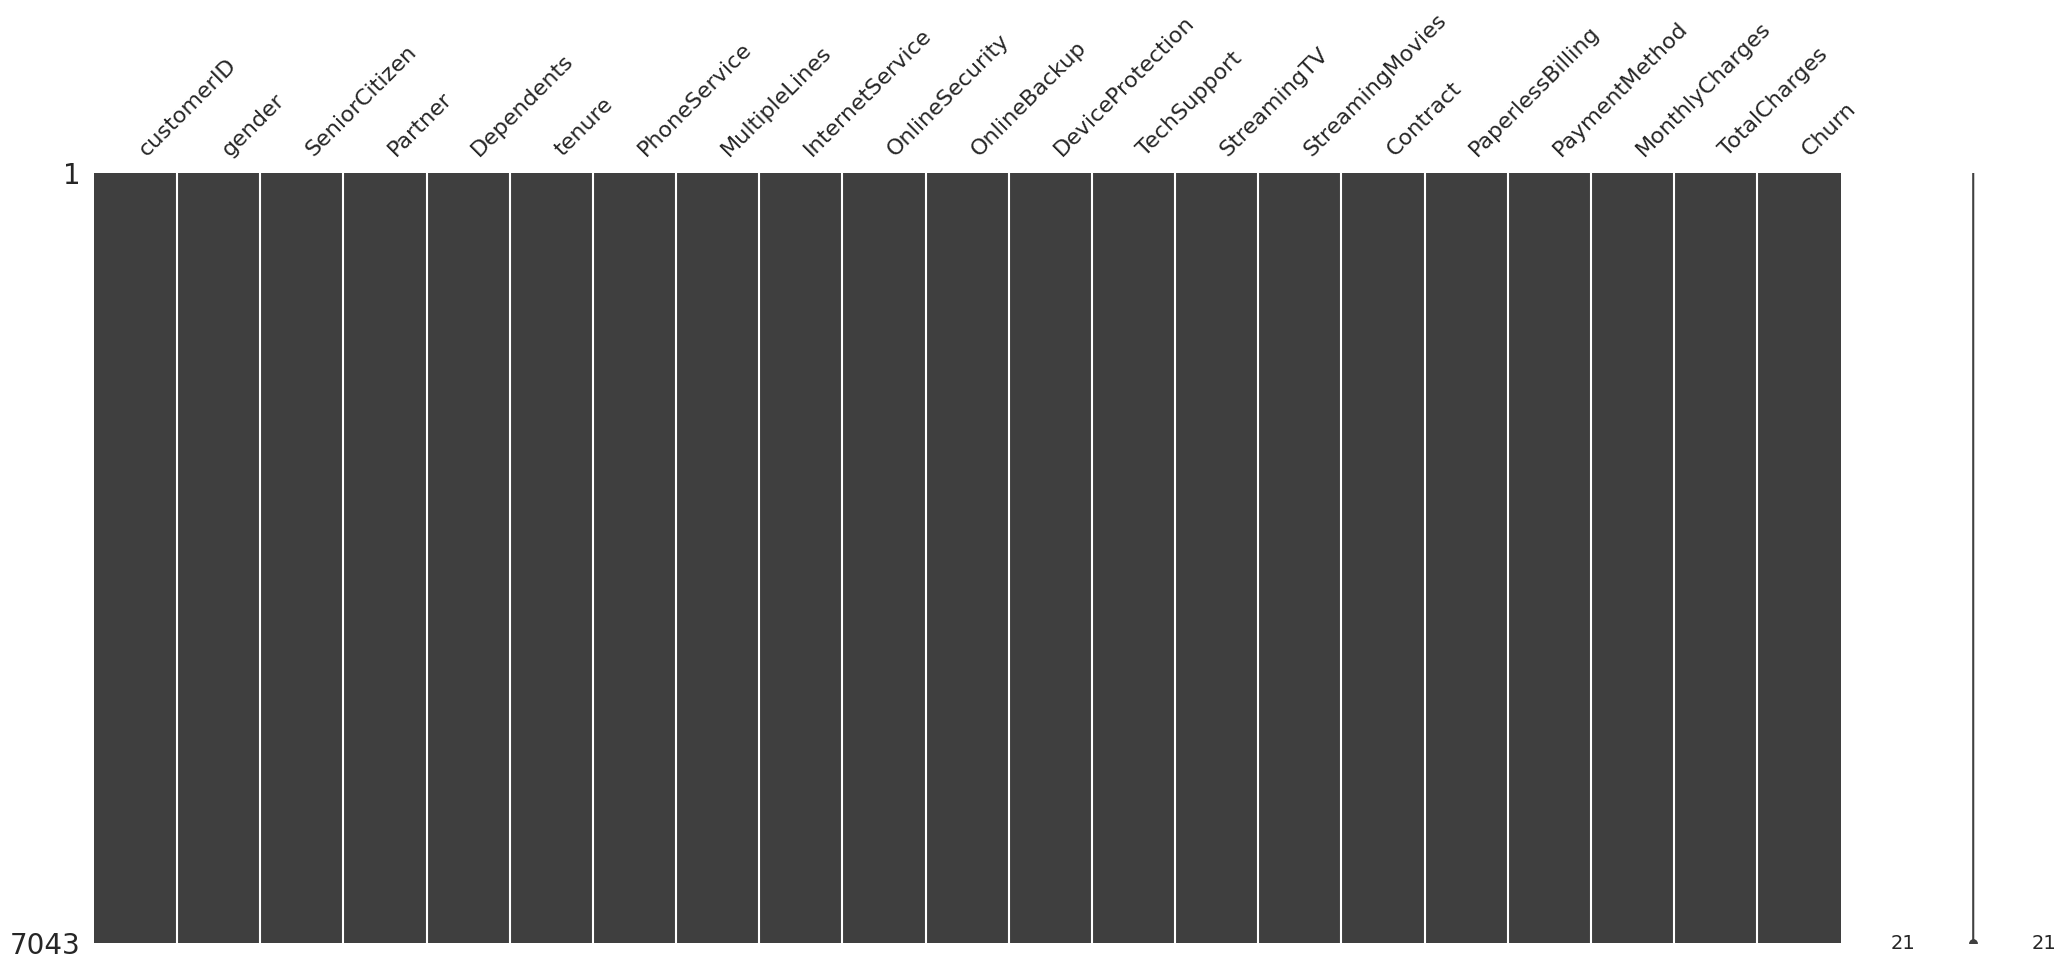

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

Dari matriks diatas kita dapat menyimpulkan bahwa tidak ada missing data

# Data Manipulation

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

# axis = 0 Menghapus baris, axis = 1 menghapus kolom

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




> On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!



In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No




> It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [ ]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')



> There are no additional missing values in the Tenure column.





> Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.



In [ ]:
# inplace=True (Mengubahd data frame asli)
# inplace=False (Mengubah pada data frame baru sehingga perlu di tampung ke sebuah variable)

df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

df[df['tenure'] == 0].index

Index([], dtype='int64')



> **To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.**



In [ ]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Data Visualization

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()



*   26.6 % of customers switched to another firm.

*   Customers are 49.5 % female and 50.5 % male.



In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

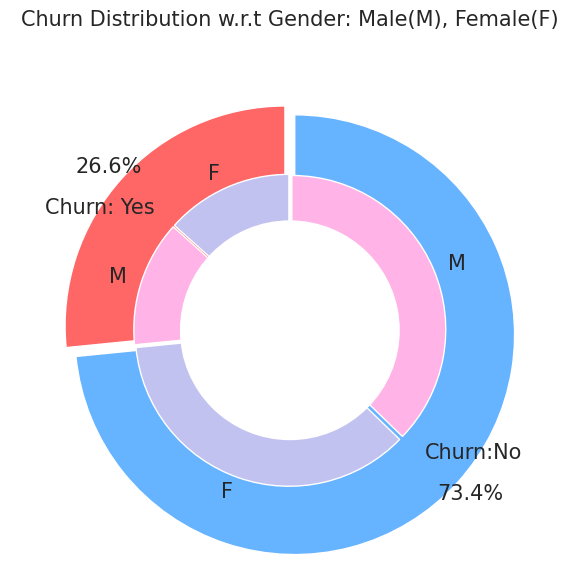

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()



*   There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.






In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()




*   **About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract**






In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", barmode="group", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Major customers who moved out were having Electronic Check as Payment Method.
*   Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out



In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()



*   A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
*   Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service



In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Customers without dependents are more likely to churn




In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Customers that doesn't have partners are more likely to churn



In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode="group", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   It can be observed that the fraction of senior citizen is very less.
*   Most of the senior citizens churn.



In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Most customers churn in the absence of online security,



In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling", barmode="group", title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Customers with Paperless Billing are most likely to churn.



In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Customers with no TechSupport are most likely to migrate to another service provider.



In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.



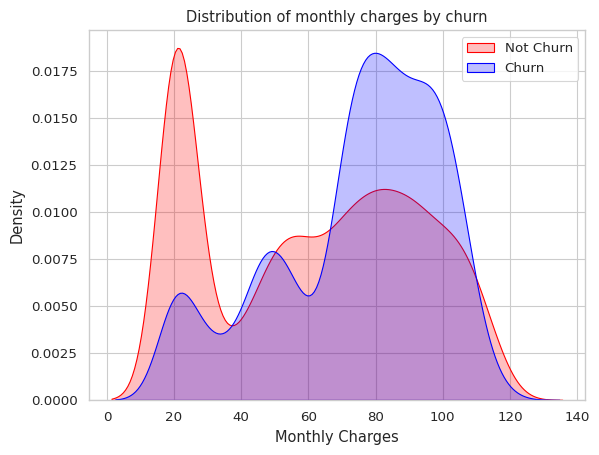

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');



*   Customers with higher Monthly Charges are also more likely to churn



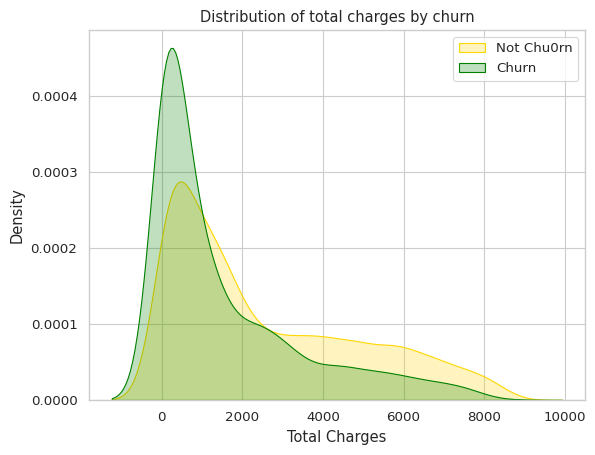

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()



*   New customers are more likely to churn



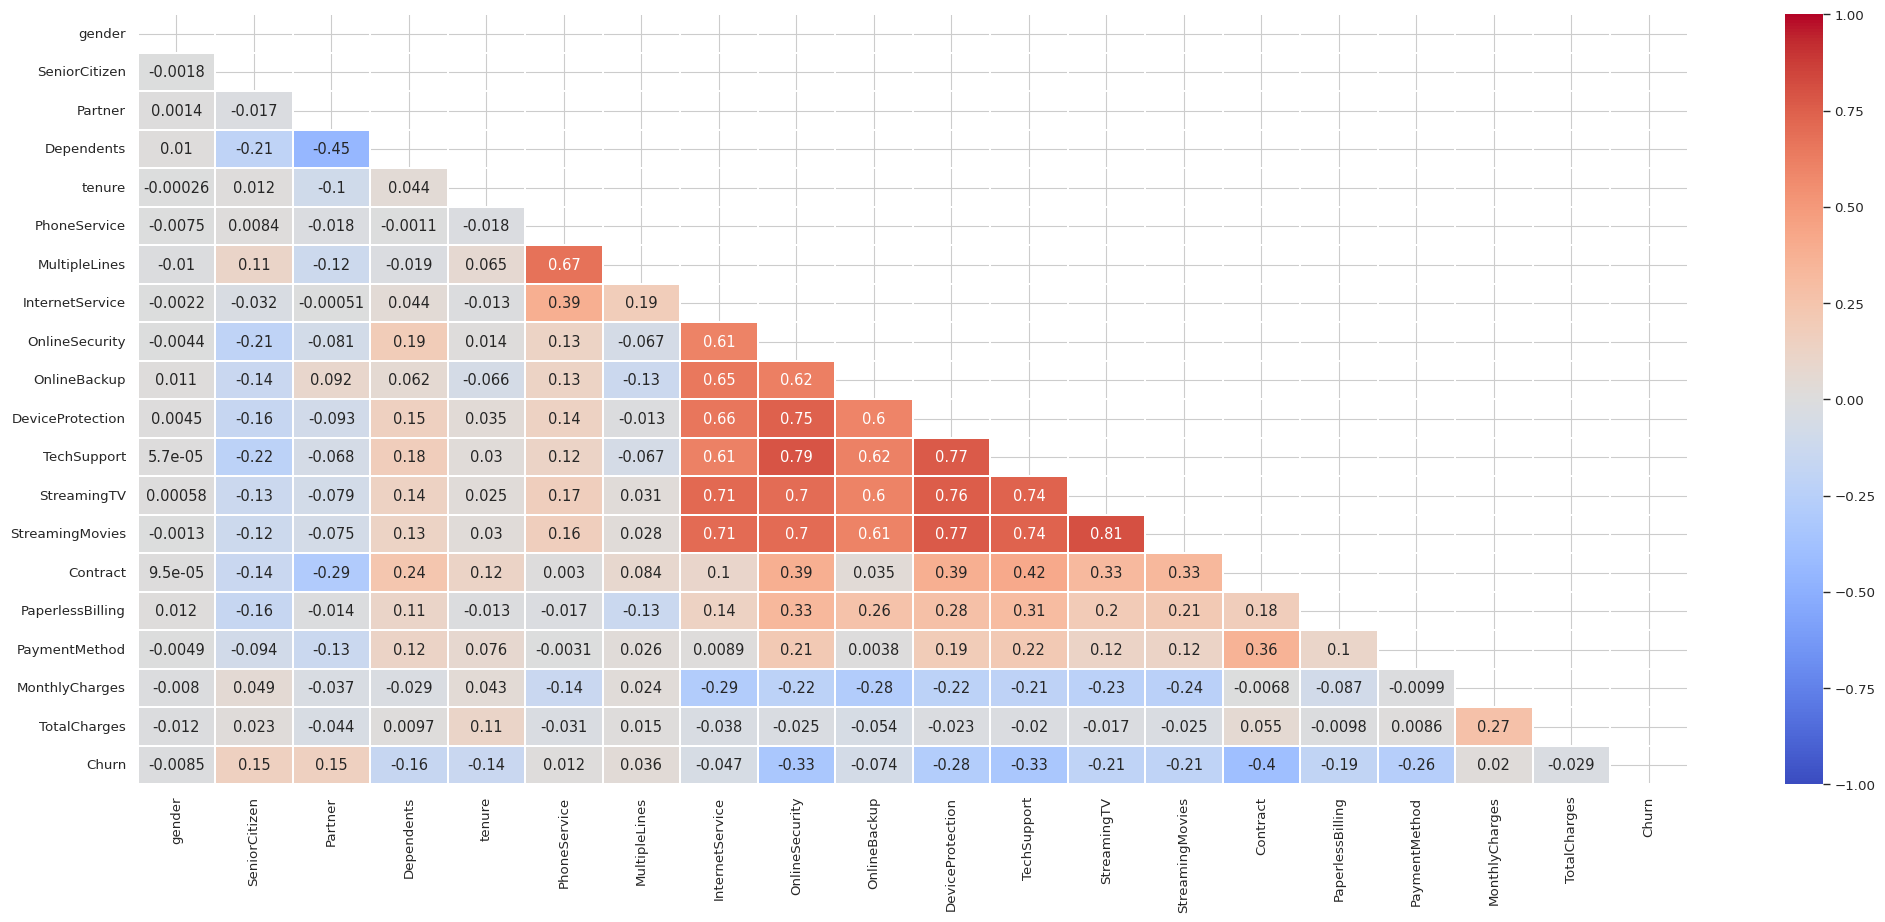

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Data Preprocessing



*   **Splitting the data into train and test sets**




In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)


Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,1,1,2,1,0,0,0,0,0,2,0,1,2,86.60,86.60
6565,1,0,1,0,61,1,2,1,2,2,0,0,2,2,0,1,2,106.20,6375.20
2212,1,0,0,0,10,1,0,2,1,1,1,1,1,1,1,0,3,19.50,225.85
2526,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.40,19.40
2751,0,0,1,1,19,0,1,0,0,0,0,0,0,0,0,1,3,24.85,434.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1,0,0,0,41,1,0,1,0,0,0,2,0,0,0,1,2,74.25,3089.10
6532,0,1,0,0,18,1,0,2,1,1,1,1,1,1,1,0,0,20.35,369.60
3528,1,0,0,0,16,1,0,2,1,1,1,1,1,1,0,1,3,19.70,342.40
943,0,0,1,0,72,0,1,0,2,2,2,2,2,2,2,0,0,65.50,4919.70


In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

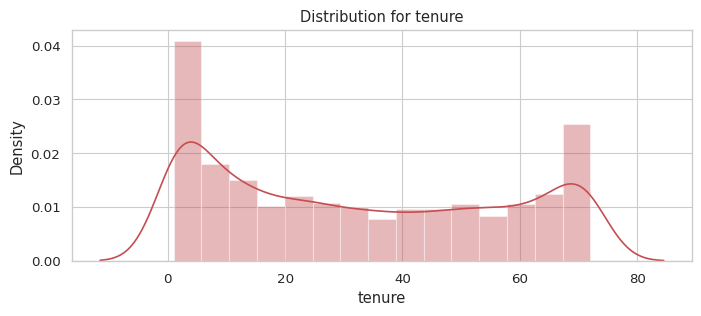

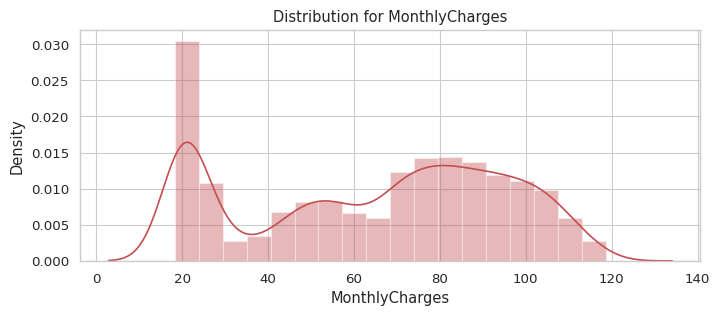

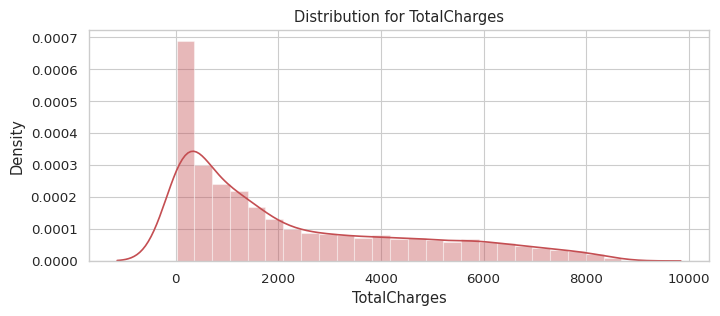

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)



*   Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.



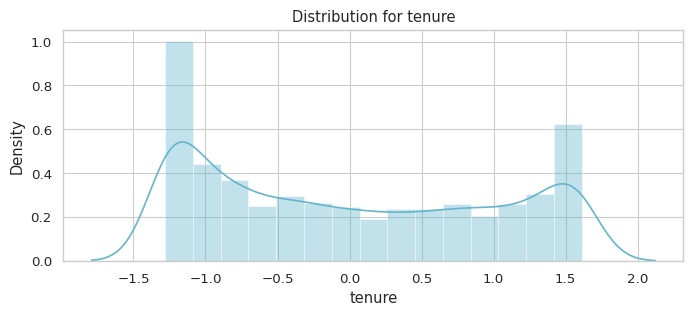

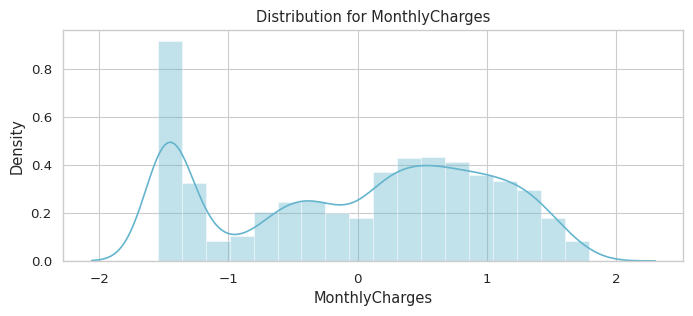

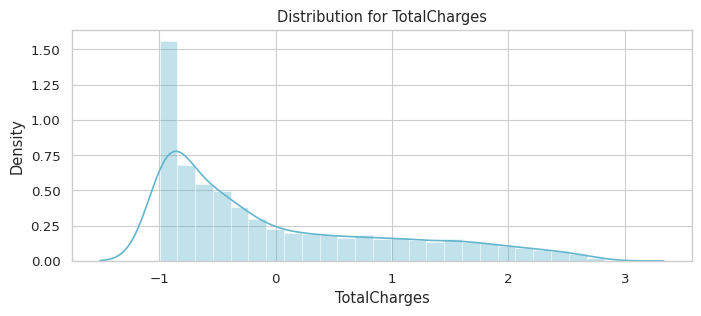

In [ ]:

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

# cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
# cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

## Uji Normalitas Data Kontinue

In [ ]:
def plot_distribusi(df)
  data = df_std['tenure']
  stats.probplot(data, dist="norm", plot=plt)
  plt.title('QQ Plot')
  plt.show()

Shapiro-Wilk Test - Statistic: 0.9037966132164001 p-value: 0.0
Data tidak terdistribusi normal (ada bukti untuk menolak H0)


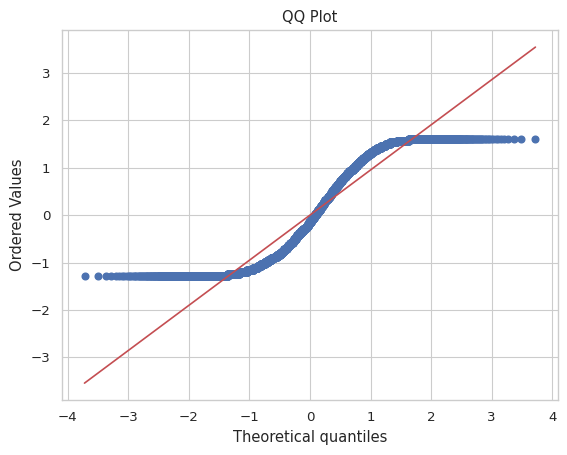

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

data = df_std['tenure']


stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot')

# Perform normality test (Shapiro-Wilk test)
stat, p_value = stats.shapiro(data)
alpha = 0.05
print("Shapiro-Wilk Test - Statistic:", stat, "p-value:", p_value)
if p_value > alpha:
    print("Data terdistribusi normal (tidak ada bukti untuk menolak H0)")
else:
    print("Data tidak terdistribusi normal (ada bukti untuk menolak H0)")

plt.show()

Shapiro-Wilk Test - Statistic: 0.9209239482879639 p-value: 0.0
Data tidak terdistribusi normal (ada bukti untuk menolak H0)


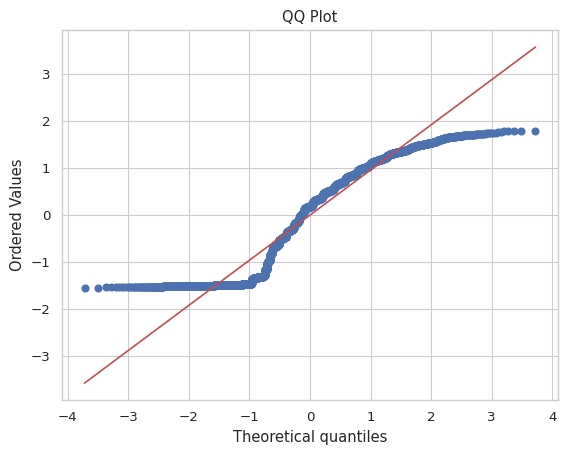

In [ ]:
# Generate some example data (replace this with your own data)
data = df_std['MonthlyCharges']

# Create QQ plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot')

# Perform normality test (Shapiro-Wilk test)
stat, p_value = stats.shapiro(data)
alpha = 0.05
print("Shapiro-Wilk Test - Statistic:", stat, "p-value:", p_value)
if p_value > alpha:
    print("Data terdistribusi normal (tidak ada bukti untuk menolak H0)")
else:
    print("Data tidak terdistribusi normal (ada bukti untuk menolak H0)")

plt.show()

Shapiro-Wilk Test - Statistic: 0.8604329228401184 p-value: 0.0
Data tidak terdistribusi normal (ada bukti untuk menolak H0)


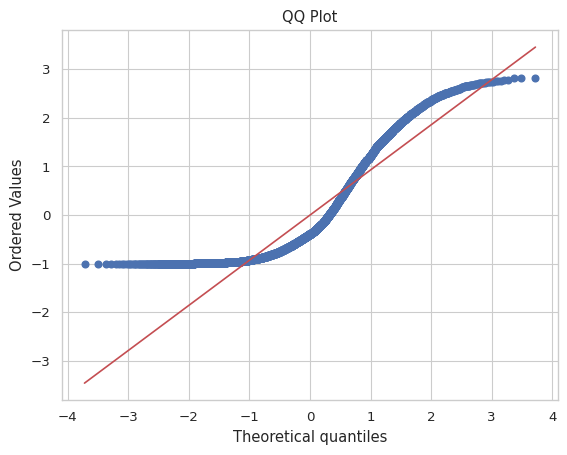

In [ ]:
# Generate some example data (replace this with your own data)
data = df_std['TotalCharges']

# Create QQ plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot')

# Perform normality test (Shapiro-Wilk test)
stat, p_value = stats.shapiro(data)
alpha = 0.05
print("Shapiro-Wilk Test - Statistic:", stat, "p-value:", p_value)
if p_value > alpha:
    print("Data terdistribusi normal (tidak ada bukti untuk menolak H0)")
else:
    print("Data tidak terdistribusi normal (ada bukti untuk menolak H0)")

plt.show()

## Uji Norm Per Kelas

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_kelas = df[['Churn']]
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
# for feat in numerical_cols: distplot(feat, df_std, color='c')

concatenated_df = pd.concat([df_std, df_kelas], axis=1)

In [ ]:
concatenated_df[['Churn']] = df[['Churn']].astype('object')

In [ ]:
concatenated_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,-1.280248,-1.161694,-0.994194,0
1,0.064303,-0.260878,-0.173740,0
2,-1.239504,-0.363923,-0.959649,1
3,0.512486,-0.747850,-0.195248,0
4,-1.239504,0.196178,-0.940457,1


In [ ]:
# Generate example data with multiple classes
num_classes = 3
data = [np.random.normal(loc=i, scale=1, size=100) for i in range(num_classes)]

# Create QQ plots for each class
fig, axes = plt.subplots(nrows=num_classes, figsize=(6, 4*num_classes))

for i, cls_data in enumerate(data):
    ax = axes[i]
    stats.probplot(cls_data, dist="norm", plot=ax)
    ax.set_title(f'QQ Plot - Class {i+1}')

plt.tight_layout()
plt.show()

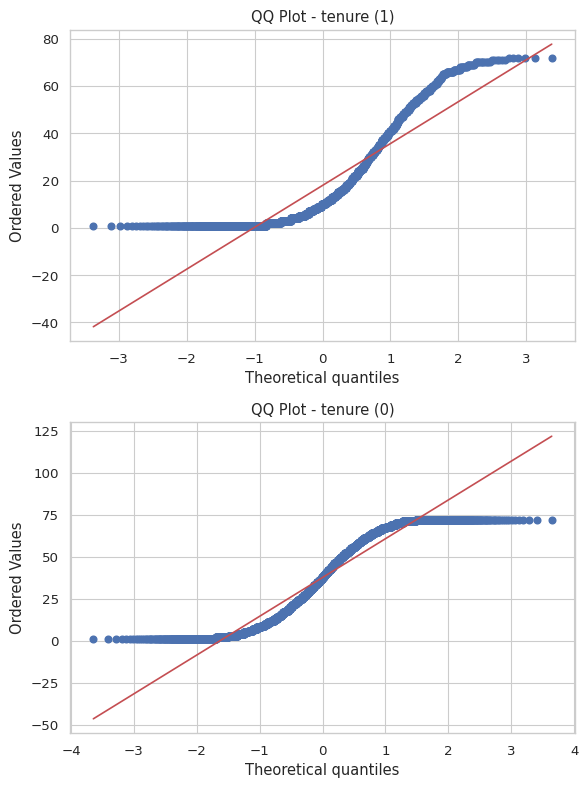

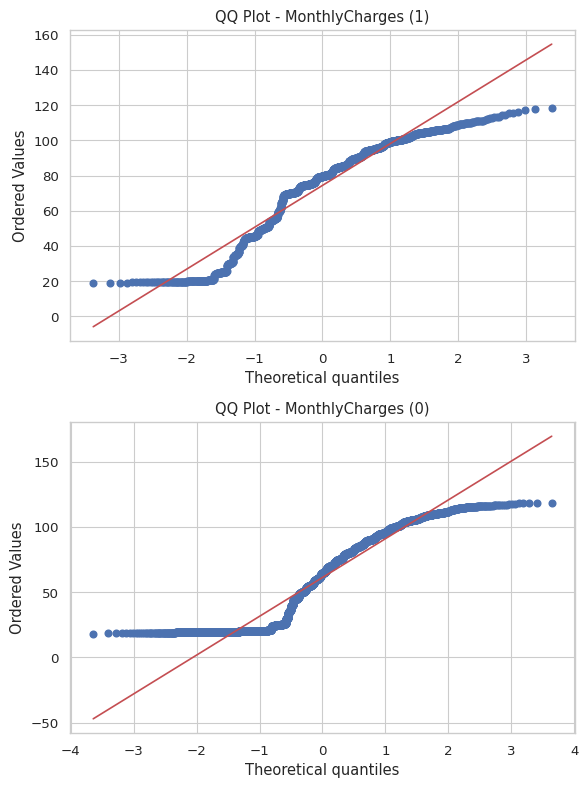

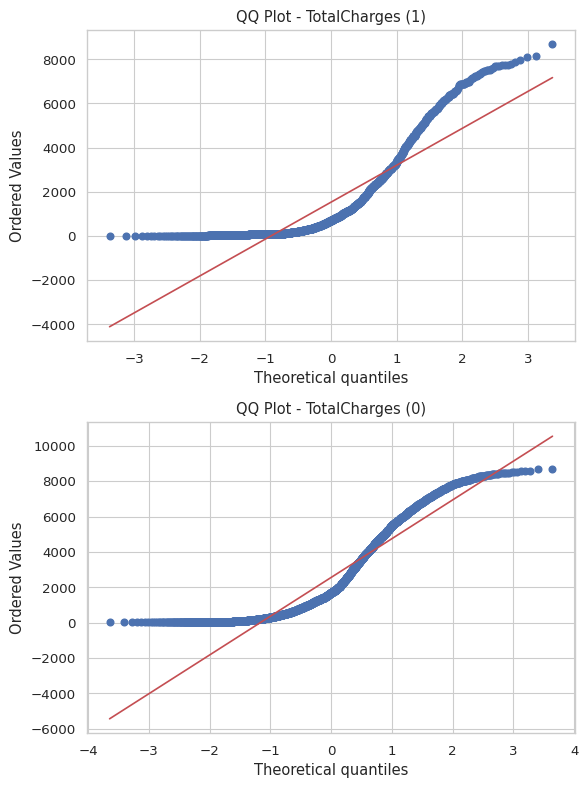

In [ ]:
data = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Membuat plot untuk setiap kolom dengan memisahkan berdasarkan kelas 'Churn' dan 'No Churn'
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    # Create QQ plots for each class
    fig, axes = plt.subplots(nrows=2, figsize=(6, 8))

    for i, churn_status in enumerate([1, 0]):
        churn_data = data[data['Churn'] == churn_status][col]
        ax = axes[i]
        stats.probplot(churn_data, dist="norm", plot=ax)
        ax.set_title(f'QQ Plot - {col} ({churn_status})')

    plt.tight_layout()
    plt.show()

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,1,1,2,1,0,0,0,0,0,2,0,1,2,86.60,86.60
6565,1,0,1,0,61,1,2,1,2,2,0,0,2,2,0,1,2,106.20,6375.20
2212,1,0,0,0,10,1,0,2,1,1,1,1,1,1,1,0,3,19.50,225.85
2526,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.40,19.40
2751,0,0,1,1,19,0,1,0,0,0,0,0,0,0,0,1,3,24.85,434.80


In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,-1.281139,1,2,1,0,0,0,0,0,2,0,1,2,0.726146,-0.970138
6565,1,0,1,0,1.170193,1,2,1,2,2,0,0,2,2,0,1,2,1.381503,1.809078
2212,1,0,0,0,-0.913439,1,0,2,1,1,1,1,1,1,1,0,3,-1.517446,-0.908597
2526,1,0,0,0,-1.281139,1,0,2,1,1,1,1,1,1,0,0,3,-1.520790,-0.999837
2751,0,0,1,1,-0.545739,0,1,0,0,0,0,0,0,0,0,1,3,-1.338561,-0.816253


In [ ]:
y_train_2d = y_train.reshape(-1, 1)

combined_array = np.hstack((X_train, y_train_2d))

# combined_array.to_csv('/content/drive/MyDrive/Private Class Pak Arnold -  Classification/Code/Customer Churn Prediction/DataTrain.csv', index=False)
dfC = pd.DataFrame(combined_array)
dfC.to_csv('/content/drive/MyDrive/Private Class Pak Arnold -  Classification/Code/Customer Churn Prediction/DataTrain.csv', index=False)

In [ ]:
y_test_2d = y_test.reshape(-1, 1)

combined_array = np.hstack((X_test, y_test_2d))

# combined_array.to_csv('/content/drive/MyDrive/Private Class Pak Arnold -  Classification/Code/Customer Churn Prediction/DataTrain.csv', index=False)
dfC = pd.DataFrame(combined_array)
dfC.to_csv('/content/drive/MyDrive/Private Class Pak Arnold -  Classification/Code/Customer Churn Prediction/DataTest.csv', index=False)

# Machine Learning Model Evaluations and Predictions

## KNN

Supervised Learning karena proses training memerlukan label output

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors =11) # angka ganjil
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [ ]:
predicted_y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



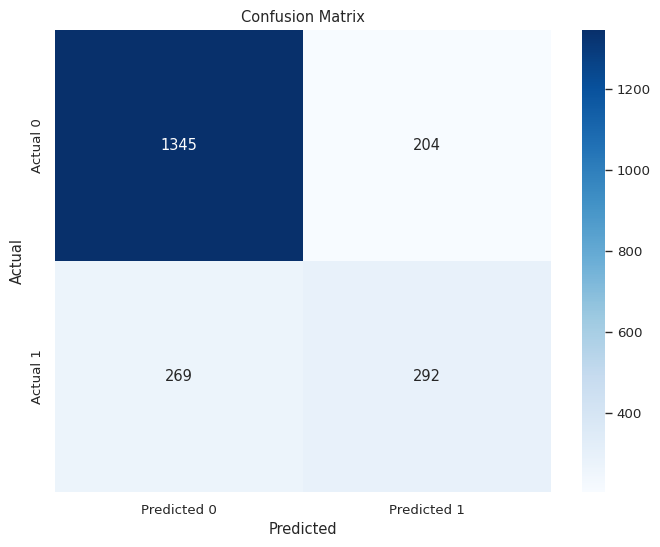

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_y)

# Membuat plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVC (Support Vector Classification)

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



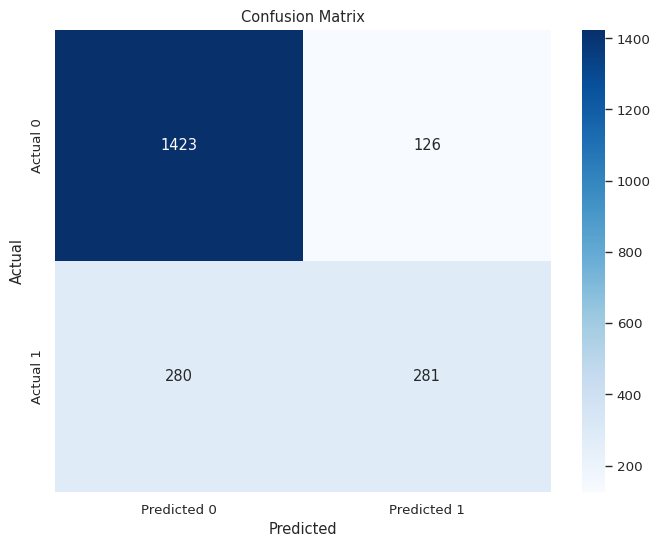

In [ ]:
cmS = confusion_matrix(y_test, predict_y)

# Membuat plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmS, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import copy
# Inisialisasi model Naive Bayes
naive_bayes_model = MultinomialNB()

# Transformasi data untuk memastikan semua nilai non-negatif
scaler = MinMaxScaler()
X_train_transformed = copy.deepcopy(X_train)
X_test_transformed = copy.deepcopy(X_test)
X_train_transformed[num_cols] = scaler.fit_transform(X_train_transformed[num_cols])
X_test_transformed[num_cols] = scaler.fit_transform(X_test_transformed[num_cols])


# Melatih model dengan data pelatihan
naive_bayes_model.fit(X_train_transformed, y_train)

# Melakukan prediksi pada data pengujian
predicted_y_nb = naive_bayes_model.predict(X_test_transformed)

# Menghitung akurasi Naive Bayes pada data pengujian
accuracy_nb = naive_bayes_model.score(X_test_transformed, y_test)
print("Naive Bayes accuracy:", accuracy_nb)


Naive Bayes accuracy: 0.7796208530805687


In [ ]:
y_train_2d = y_train.reshape(-1, 1)

combined_array = np.hstack((X_train_transformed, y_train_2d))

# combined_array.to_csv('/content/drive/MyDrive/Private Class Pak Arnold -  Classification/Code/Customer Churn Prediction/DataTrain.csv', index=False)
dfC = pd.DataFrame(combined_array)
dfC.to_csv('/content/drive/MyDrive/Private Class Pak Arnold -  Classification/Code/Customer Churn Prediction/DataTrainNaiveBayes.csv', index=False)

In [ ]:
# Menampilkan laporan klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y_nb))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1549
           1       0.58      0.64      0.61       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.73      2110
weighted avg       0.79      0.78      0.78      2110



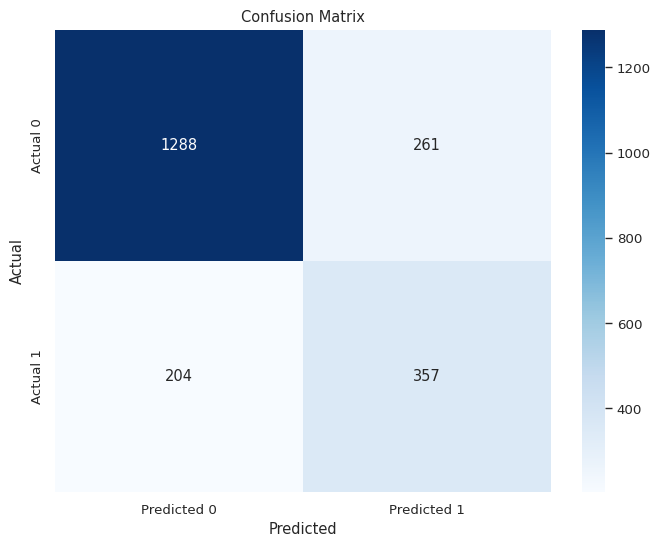

In [ ]:
cmS = confusion_matrix(y_test, predicted_y_nb)

# Membuat plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmS, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
X_train_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,0.000000,1,2,1,0,0,0,0,0,2,0,1,2,0.679621,0.007824
6565,1,0,1,0,0.845070,1,2,1,2,2,0,0,2,2,0,1,2,0.874938,0.733487
2212,1,0,0,0,0.126761,1,0,2,1,1,1,1,1,1,1,0,3,0.010962,0.023892
2526,1,0,0,0,0.000000,1,0,2,1,1,1,1,1,1,0,0,3,0.009965,0.000069
2751,0,0,1,1,0.253521,0,1,0,0,0,0,0,0,0,0,1,3,0.064275,0.048004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1,0,0,0,0.563380,1,0,1,0,0,0,2,0,0,0,1,2,0.556552,0.354293
6532,0,1,0,0,0.239437,1,0,2,1,1,1,1,1,1,1,0,0,0.019432,0.040480
3528,1,0,0,0,0.211268,1,0,2,1,1,1,1,1,1,0,1,3,0.012955,0.037341
943,0,0,1,0,1.000000,0,1,0,2,2,2,2,2,2,2,0,0,0.469357,0.565532


## Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7279620853080568


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



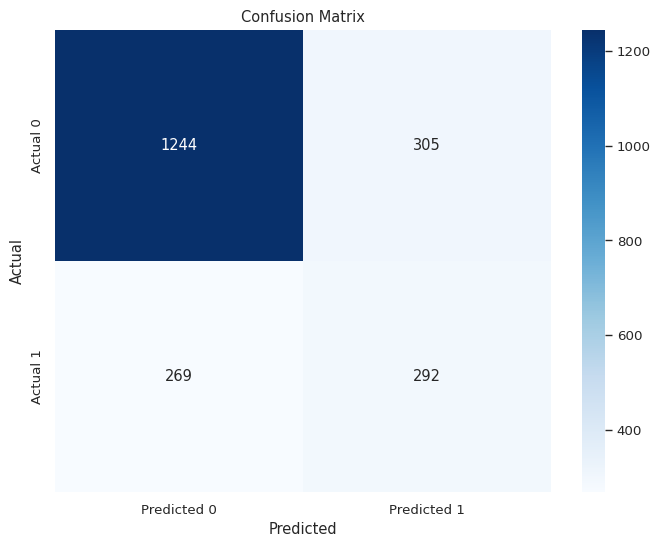

In [ ]:
cmS = confusion_matrix(y_test, predictdt_y)

# Membuat plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmS, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



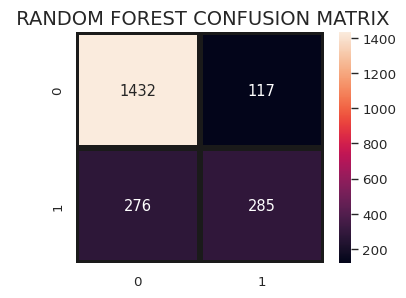

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

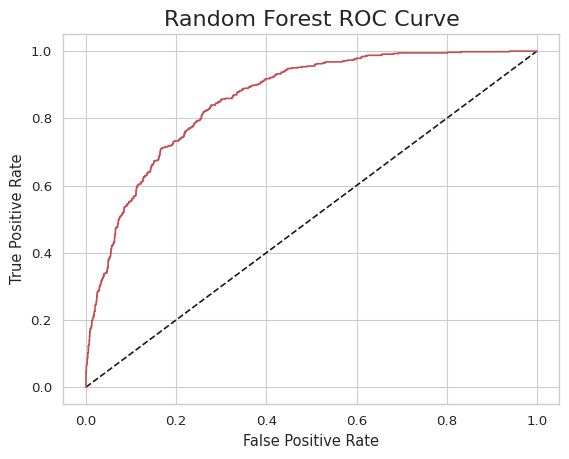

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

## Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



In [ ]:
lr_pred

array([0, 0, 0, ..., 1, 1, 0])

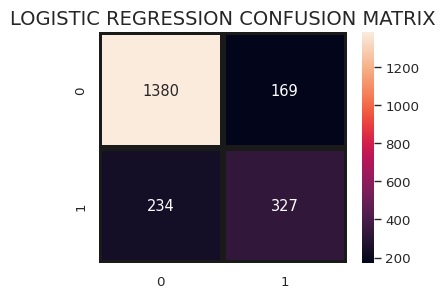

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

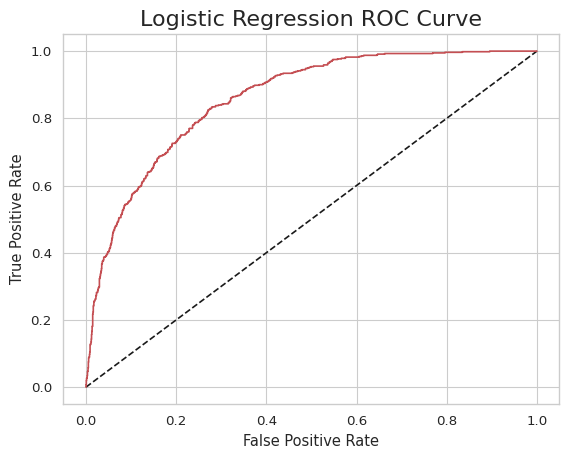

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

Optimization terminated successfully.
         Current function value: 0.422239
         Iterations 8


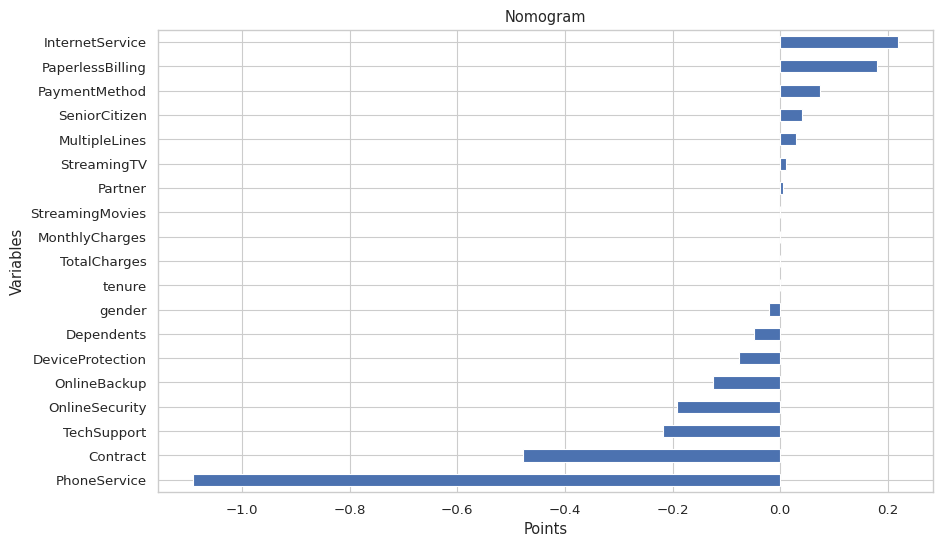

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
import statsmodels.api as sm

# # Generate sample data
# np.random.seed(0)
# data = {
#     'Cat_Var1': np.random.choice(['A', 'B', 'C'], size=1000),
#     'Cat_Var2': np.random.choice(['X', 'Y', 'Z'], size=1000),
#     'Cat_Var3': np.random.choice(['Low', 'Medium', 'High'], size=1000),
#     'Cat_Var4': np.random.choice(['Yes', 'No'], size=1000),
#     'Cont_Var1': np.random.normal(loc=50, scale=10, size=1000),
#     'Cont_Var2': np.random.normal(loc=30, scale=5, size=1000),
#     'Cont_Var3': np.random.normal(loc=70, scale=15, size=1000),
#     'Label': np.random.choice([0, 1], size=1000)
# }

# df = pd.DataFrame(data)

# # Convert categorical variables to dummy variables
# df = pd.get_dummies(df, columns=['Cat_Var1', 'Cat_Var2', 'Cat_Var3', 'Cat_Var4'], drop_first=True)

# # Add constant term for intercept
# df['Intercept'] = 1.0

# # Define predictors and target variable
# X = df.drop(columns='Label')
# y = df['Label']

# # Fit logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Generate nomogram
plt.figure(figsize=(10, 6))
points = result.params * X_train.mean()
points.sort_values().plot(kind="barh")
plt.title('Nomogram')
plt.xlabel('Points')
plt.ylabel('Variables')
plt.show()


In [ ]:
points

gender             -1.998874e-02
SeniorCitizen       4.148819e-02
Partner             5.244091e-03
Dependents         -4.835445e-02
tenure             -9.269412e-17
PhoneService       -1.090279e+00
MultipleLines       2.924579e-02
InternetService     2.189756e-01
OnlineSecurity     -1.915501e-01
OnlineBackup       -1.243781e-01
DeviceProtection   -7.663274e-02
TechSupport        -2.178882e-01
StreamingTV         1.146835e-02
StreamingMovies     1.246060e-04
Contract           -4.786106e-01
PaperlessBilling    1.797136e-01
PaymentMethod       7.487871e-02
MonthlyCharges      9.560800e-17
TotalCharges       -5.326951e-17
dtype: float64

In [ ]:
result.params

gender             -0.039026
SeniorCitizen       0.259143
Partner             0.010701
Dependents         -0.161905
tenure             -1.395872
PhoneService       -1.208638
MultipleLines       0.031225
InternetService     0.253540
OnlineSecurity     -0.241932
OnlineBackup       -0.137108
DeviceProtection   -0.085433
TechSupport        -0.270478
StreamingTV         0.011670
StreamingMovies     0.000125
Contract           -0.697372
PaperlessBilling    0.304597
PaymentMethod       0.047476
MonthlyCharges      0.708327
TotalCharges        0.670915
dtype: float64

In [ ]:
X_train.mean()

gender              5.121902e-01
SeniorCitizen       1.600975e-01
Partner             4.900447e-01
Dependents          2.986591e-01
tenure              6.640586e-17
PhoneService        9.020723e-01
MultipleLines       9.366111e-01
InternetService     8.636733e-01
OnlineSecurity      7.917513e-01
OnlineBackup        9.071516e-01
DeviceProtection    8.969931e-01
TechSupport         8.055668e-01
StreamingTV         9.827306e-01
StreamingMovies     9.953271e-01
Contract            6.863064e-01
PaperlessBilling    5.900041e-01
PaymentMethod       1.577204e+00
MonthlyCharges      1.349771e-16
TotalCharges       -7.939831e-17
dtype: float64

In [ ]:
!pip install pynomo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.2/116.2 kB 1.3 MB/s eta 0:00:00


In [ ]:
def hitung_likelihood_gaussian_multi(data_uji):

  hasil = (1/math.sqrt(2*math.pi*(std**2)))*math.exp((-1*((data- rata2)**2))/(2*(std**2)))
return hasil

SyntaxError: 'return' outside function (<ipython-input-114-cd2cd65e322b>, line 4)

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Generate some example data (replace this with your own data)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create QQ plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot')

# Perform normality test (Shapiro-Wilk test)
stat, p_value = stats.shapiro(data)
alpha = 0.05
print("Shapiro-Wilk Test - Statistic:", stat, "p-value:", p_value)
if p_value > alpha:
    print("Data terdistribusi normal (tidak ada bukti untuk menolak H0)")
else:
    print("Data tidak terdistribusi normal (ada bukti untuk menolak H0)")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Generate example data with multiple columns
data = np.random.normal(loc=0, scale=1, size=(1000, 5))  # 5 columns

# Create QQ plots for each column
num_cols = data.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

for i in range(num_cols):
    ax = axes[i]
    stats.probplot(data[:, i], dist="norm", plot=ax)
    ax.set_title(f'QQ Plot - Column {i+1}')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate example data with multiple columns
data = pd.DataFrame(np.random.normal(loc=0, scale=1, size=(1000, 5)), columns=['A', 'B', 'C', 'D', 'E'])

# Create QQ plot for all columns in one plot
sns.set(style="whitegrid")
sns.pairplot(data, kind="qq", plot_kws={'line':'45'})
plt.suptitle('QQ Plot for Multiple Columns')
plt.show()


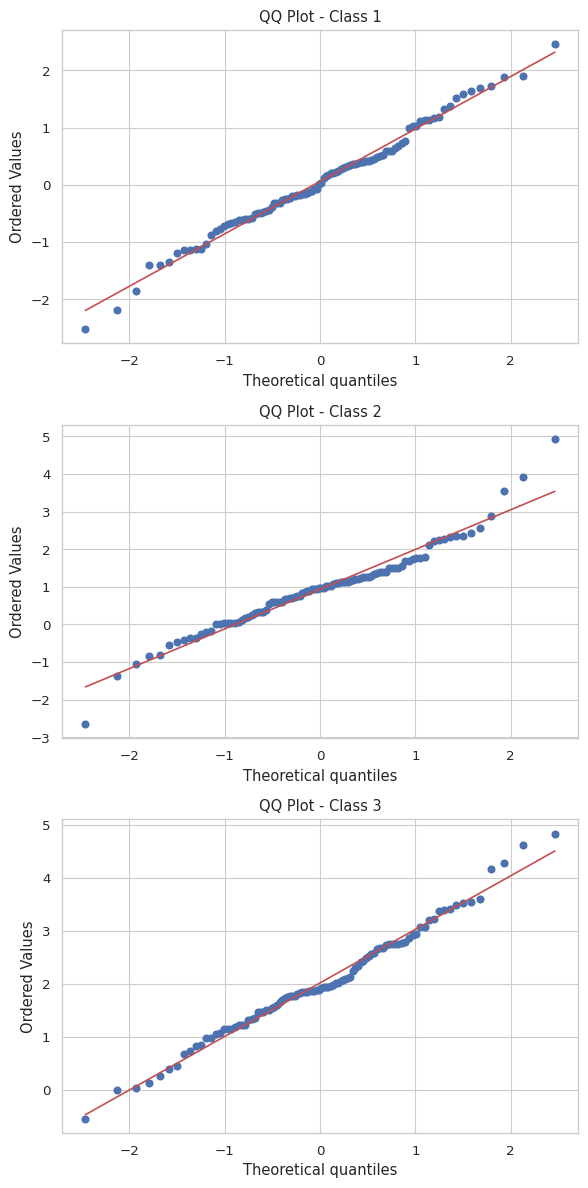

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Generate example data with multiple classes
num_classes = 3
data = [np.random.normal(loc=i, scale=1, size=100) for i in range(num_classes)]

# Create QQ plots for each class
fig, axes = plt.subplots(nrows=num_classes, figsize=(6, 4*num_classes))

for i, cls_data in enumerate(data):
    ax = axes[i]
    stats.probplot(cls_data, dist="norm", plot=ax)
    ax.set_title(f'QQ Plot - Class {i+1}')

plt.tight_layout()
plt.show()